In [1]:
import evo
import numpy as np
import pandas as pd
import csv

from matplotlib.pyplot import figure, show, subplots
from matplotlib import pyplot as plt
from labellines import *
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib.lines import Line2D

#import yaml
from ruamel.yaml import YAML
yaml = YAML()
yaml.preserve_quotes = True  # Keep quotes if they exist
yaml.indent(mapping=2, sequence=4, offset=2)  # Preserve indentation
yaml.representer.add_representer(
    float, lambda dumper, data: dumper.represent_scalar("tag:yaml.org,2002:float", str(data))
)

# Only fo2 dependent

In [2]:
data = []
fo2_range = np.linspace(-4,4,20)
ATOMIC_H_value = 100

for i in fo2_range:
    # Load YAML file
    with open("../config/env.yaml", "r") as file:
        config = yaml.load(file) or {}

    # Modify values
    config["FO2_buffer_START"] = float(i)
    config["ATOMIC_H"] = ATOMIC_H_value

    # Write back to YAML file
    with open("../config/env.yaml", "w") as file:
        yaml.dump(config, file)

    # run evo
    evo.run_evo("../config/chem.yaml", "../config/env.yaml", "../config/output.yaml", folder="../output")
    data.append(np.genfromtxt('../output/dgs_output_basalt_COHSN_closed_1473K.csv',skip_header=1,delimiter=',')[-1][9:19])
data = np.array(data)

Reading in from:
Chemistry file: ../config/chem.yaml
Environment file: ../config/env.yaml
Output file: ../config/output.yaml 

Set parameters:
COMPOSITION = basalt
RUN_TYPE = closed
SINGLE_STEP = False
FIND_SATURATION = False
GAS_SYS = COHSN
FE_SYSTEM = True
OCS = False
S_SAT_WARN = False
T_START = 1473.15
P_START = 3000.0
P_STOP = 1.0
DP_MIN = 0.001
DP_MAX = 100.0
MASS = 100.0
WgT = 1e-05
LOSS_FRAC = 0.9999
DENSITY_MODEL = spera2000
FO2_MODEL = kc1991
FMQ_MODEL = frost1991
H2O_MODEL = burguisser2015
H2_MODEL = gaillard2003
C_MODEL = eguchi2018
CO_MODEL = armstrong2015
CH4_MODEL = ardia2013
SULFIDE_CAPACITY = oneill2020
SULFATE_CAPACITY = nash2019
SCSS = liu2007
N_MODEL = libourel2003
FO2_buffer_SET = True
FO2_buffer = IW
FO2_buffer_START = -4.0
FO2_SET = True
FO2_START = 8.3777516486972e-12
FH2_SET = False
FH2_START = 0.24
FH2O_SET = False
FH2O_START = 1000.0
FCO2_SET = False
FCO2_START = 1.0
ATOMIC_MASS_SET = True
ATOMIC_H = 100.0
ATOMIC_C = 200.0
ATOMIC_S = 4000.0
ATOMIC_N = 10.0
WT

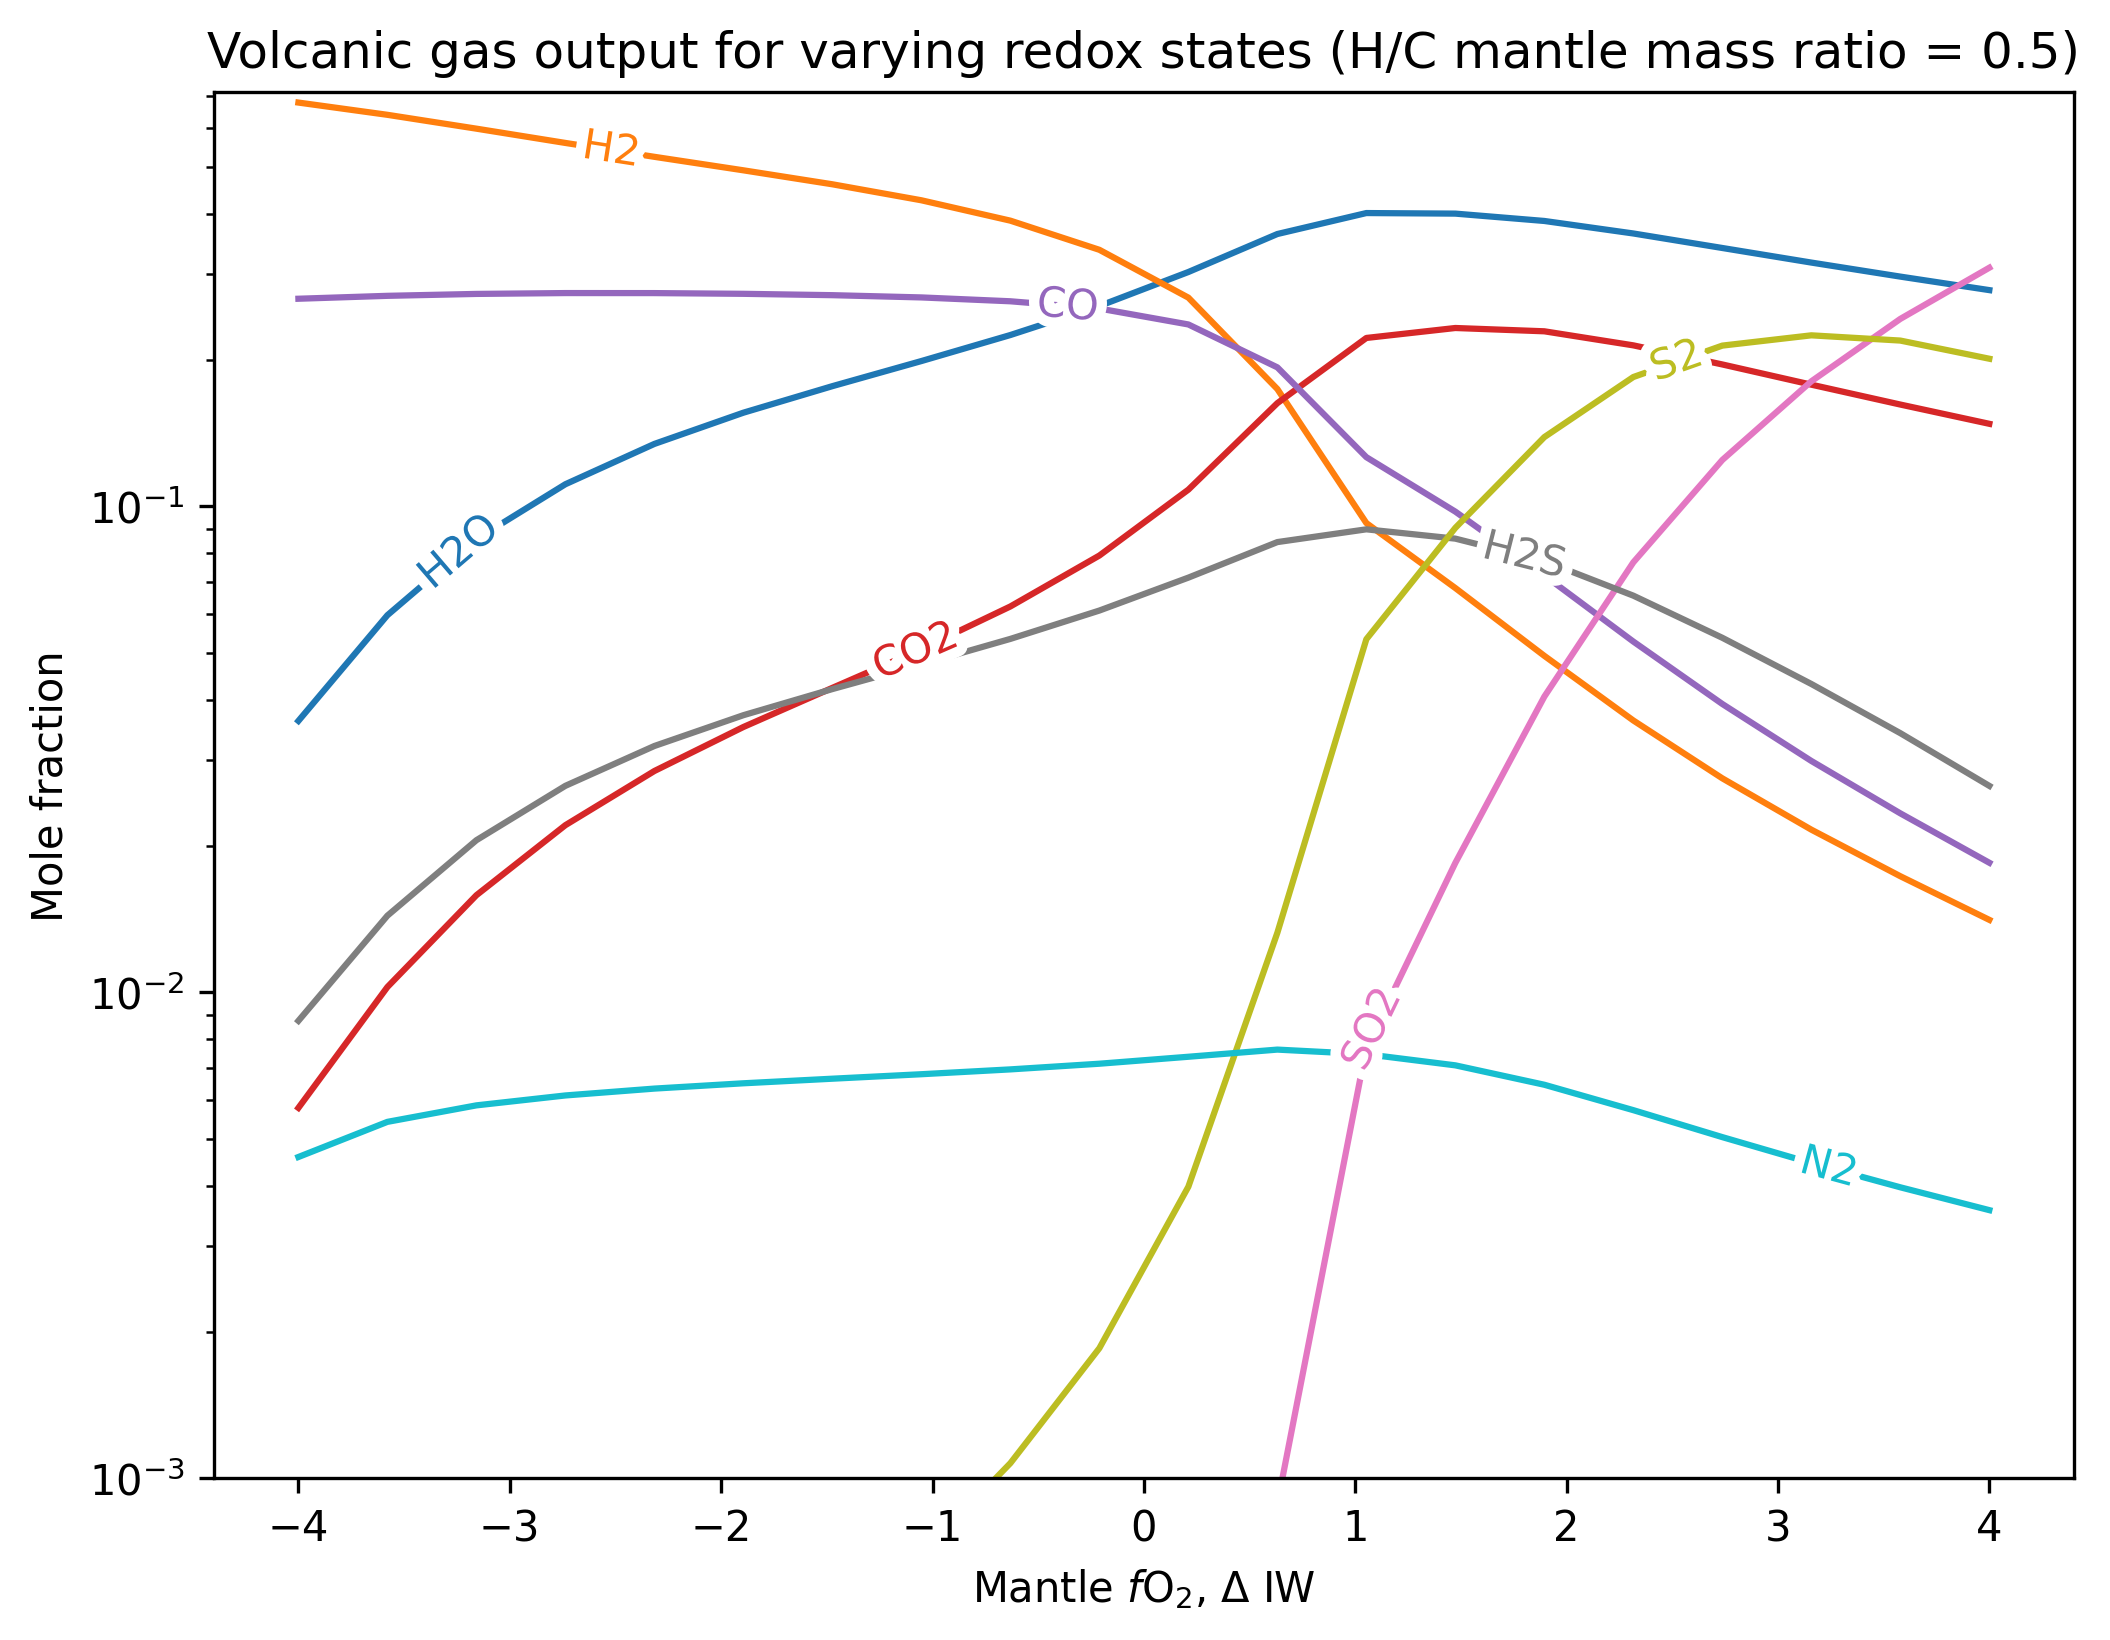

In [4]:
volatile_labels = ['H2O', 'H2', 'O2', 'CO2', 'CO', 'CH4', 'SO2', 'H2S', 'S2', 'N2']

fig = figure(figsize=(8,6))
frame1 = fig.add_subplot(1,1,1)
for i in range(len(volatile_labels)):
    frame1.plot(fo2_range,data[:,i],label=volatile_labels[i])
frame1.set_xlabel("Mantle $f$O$_2$, $\Delta$ IW")
frame1.set_ylabel('Mole fraction')
frame1.set_ylim(1E-3)
frame1.set_yscale('log')
frame1.set_title("Volcanic gas output for varying redox states (H/C mantle mass ratio = 0.5)")
labelLines(plt.gca().get_lines())
filepath = "../output/figures/EVo_1dplot_H" + str(ATOMIC_H_value) + ".png"
fig.savefig(filepath)
show()

# fo2 and C/H dependent

In [8]:
data_mole = []
data_weight = []

# Load fo2 and H inputs
with open("../config/masterconfig.yaml", "r") as file:
    EVo_config = yaml.load(file) or {}
fo2_range = np.linspace(EVo_config['FO2_start'],EVo_config['FO2_stop'],EVo_config['FO2_steps'])
H_range = np.linspace(EVo_config['ATOMIC_H_start'],EVo_config['ATOMIC_H_stop'],EVo_config['ATOMIC_H_steps'])
HC_ratios = H_range/200

for i in fo2_range:
    for j in H_range:
        # Load YAML file
        with open("../config/env.yaml", "r") as file:
            config = yaml.load(file) or {}

        # Modify fo2 and H values
        config["FO2_buffer_START"] = float(i)
        config["ATOMIC_H"] = float(j)

        # Write back to YAML file
        with open("../config/env.yaml", "w") as file:
            yaml.dump(config, file)

        # run evo
        evo.run_evo("../config/chem.yaml", "../config/env.yaml", "../config/output.yaml", folder="../output")
        
        # write data
        data_mole.append(np.genfromtxt('../output/dgs_output_basalt_COHSN_closed_1473K.csv',skip_header=1,delimiter=',')[-1][9:19])
        data_weight.append(np.genfromtxt('../output/dgs_output_basalt_COHSN_closed_1473K.csv',skip_header=1,delimiter=',')[-1][19:29])

data_mole = np.array(data_mole)
data_weight = np.array(data_weight)

Reading in from:
Chemistry file: ../config/chem.yaml
Environment file: ../config/env.yaml
Output file: ../config/output.yaml 

Set parameters:
COMPOSITION = basalt
RUN_TYPE = closed
SINGLE_STEP = False
FIND_SATURATION = False
GAS_SYS = COHSN
FE_SYSTEM = True
OCS = False
S_SAT_WARN = False
T_START = 1473.15
P_START = 3000.0
P_STOP = 1.0
DP_MIN = 0.001
DP_MAX = 100.0
MASS = 100.0
WgT = 1e-05
LOSS_FRAC = 0.9999
DENSITY_MODEL = spera2000
FO2_MODEL = kc1991
FMQ_MODEL = frost1991
H2O_MODEL = burguisser2015
H2_MODEL = gaillard2003
C_MODEL = eguchi2018
CO_MODEL = armstrong2015
CH4_MODEL = ardia2013
SULFIDE_CAPACITY = oneill2020
SULFATE_CAPACITY = nash2019
SCSS = liu2007
N_MODEL = libourel2003
FO2_buffer_SET = True
FO2_buffer = IW
FO2_buffer_START = -4.0
FO2_SET = True
FO2_START = 8.3777516486972e-12
FH2_SET = False
FH2_START = 0.24
FH2O_SET = False
FH2O_START = 1000.0
FCO2_SET = False
FCO2_START = 1.0
ATOMIC_MASS_SET = True
ATOMIC_H = 100.0
ATOMIC_C = 200.0
ATOMIC_S = 4000.0
ATOMIC_N = 10.0
WT

In [9]:
# get fo2, H coordinates:
coords = []
for i in fo2_range:
    for j in HC_ratios:
        coords.append([i,j])

def write_data(filepath,data):
    with open(filepath, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['fo2','H/C','H2O', 'H2', 'O2', 'CO2', 'CO', 'CH4', 'SO2', 'H2S', 'S2', 'N2'])
        for i in range(len(data)):
            string = [str(coords[i][0]),str(coords[i][1])]
            for j in data[i]:
                string.append(str(j))
            writer.writerow(string)

write_data('../output/atmospheres_mole.csv', data_mole)
write_data('../output/atmospheres_weight.csv', data_weight)

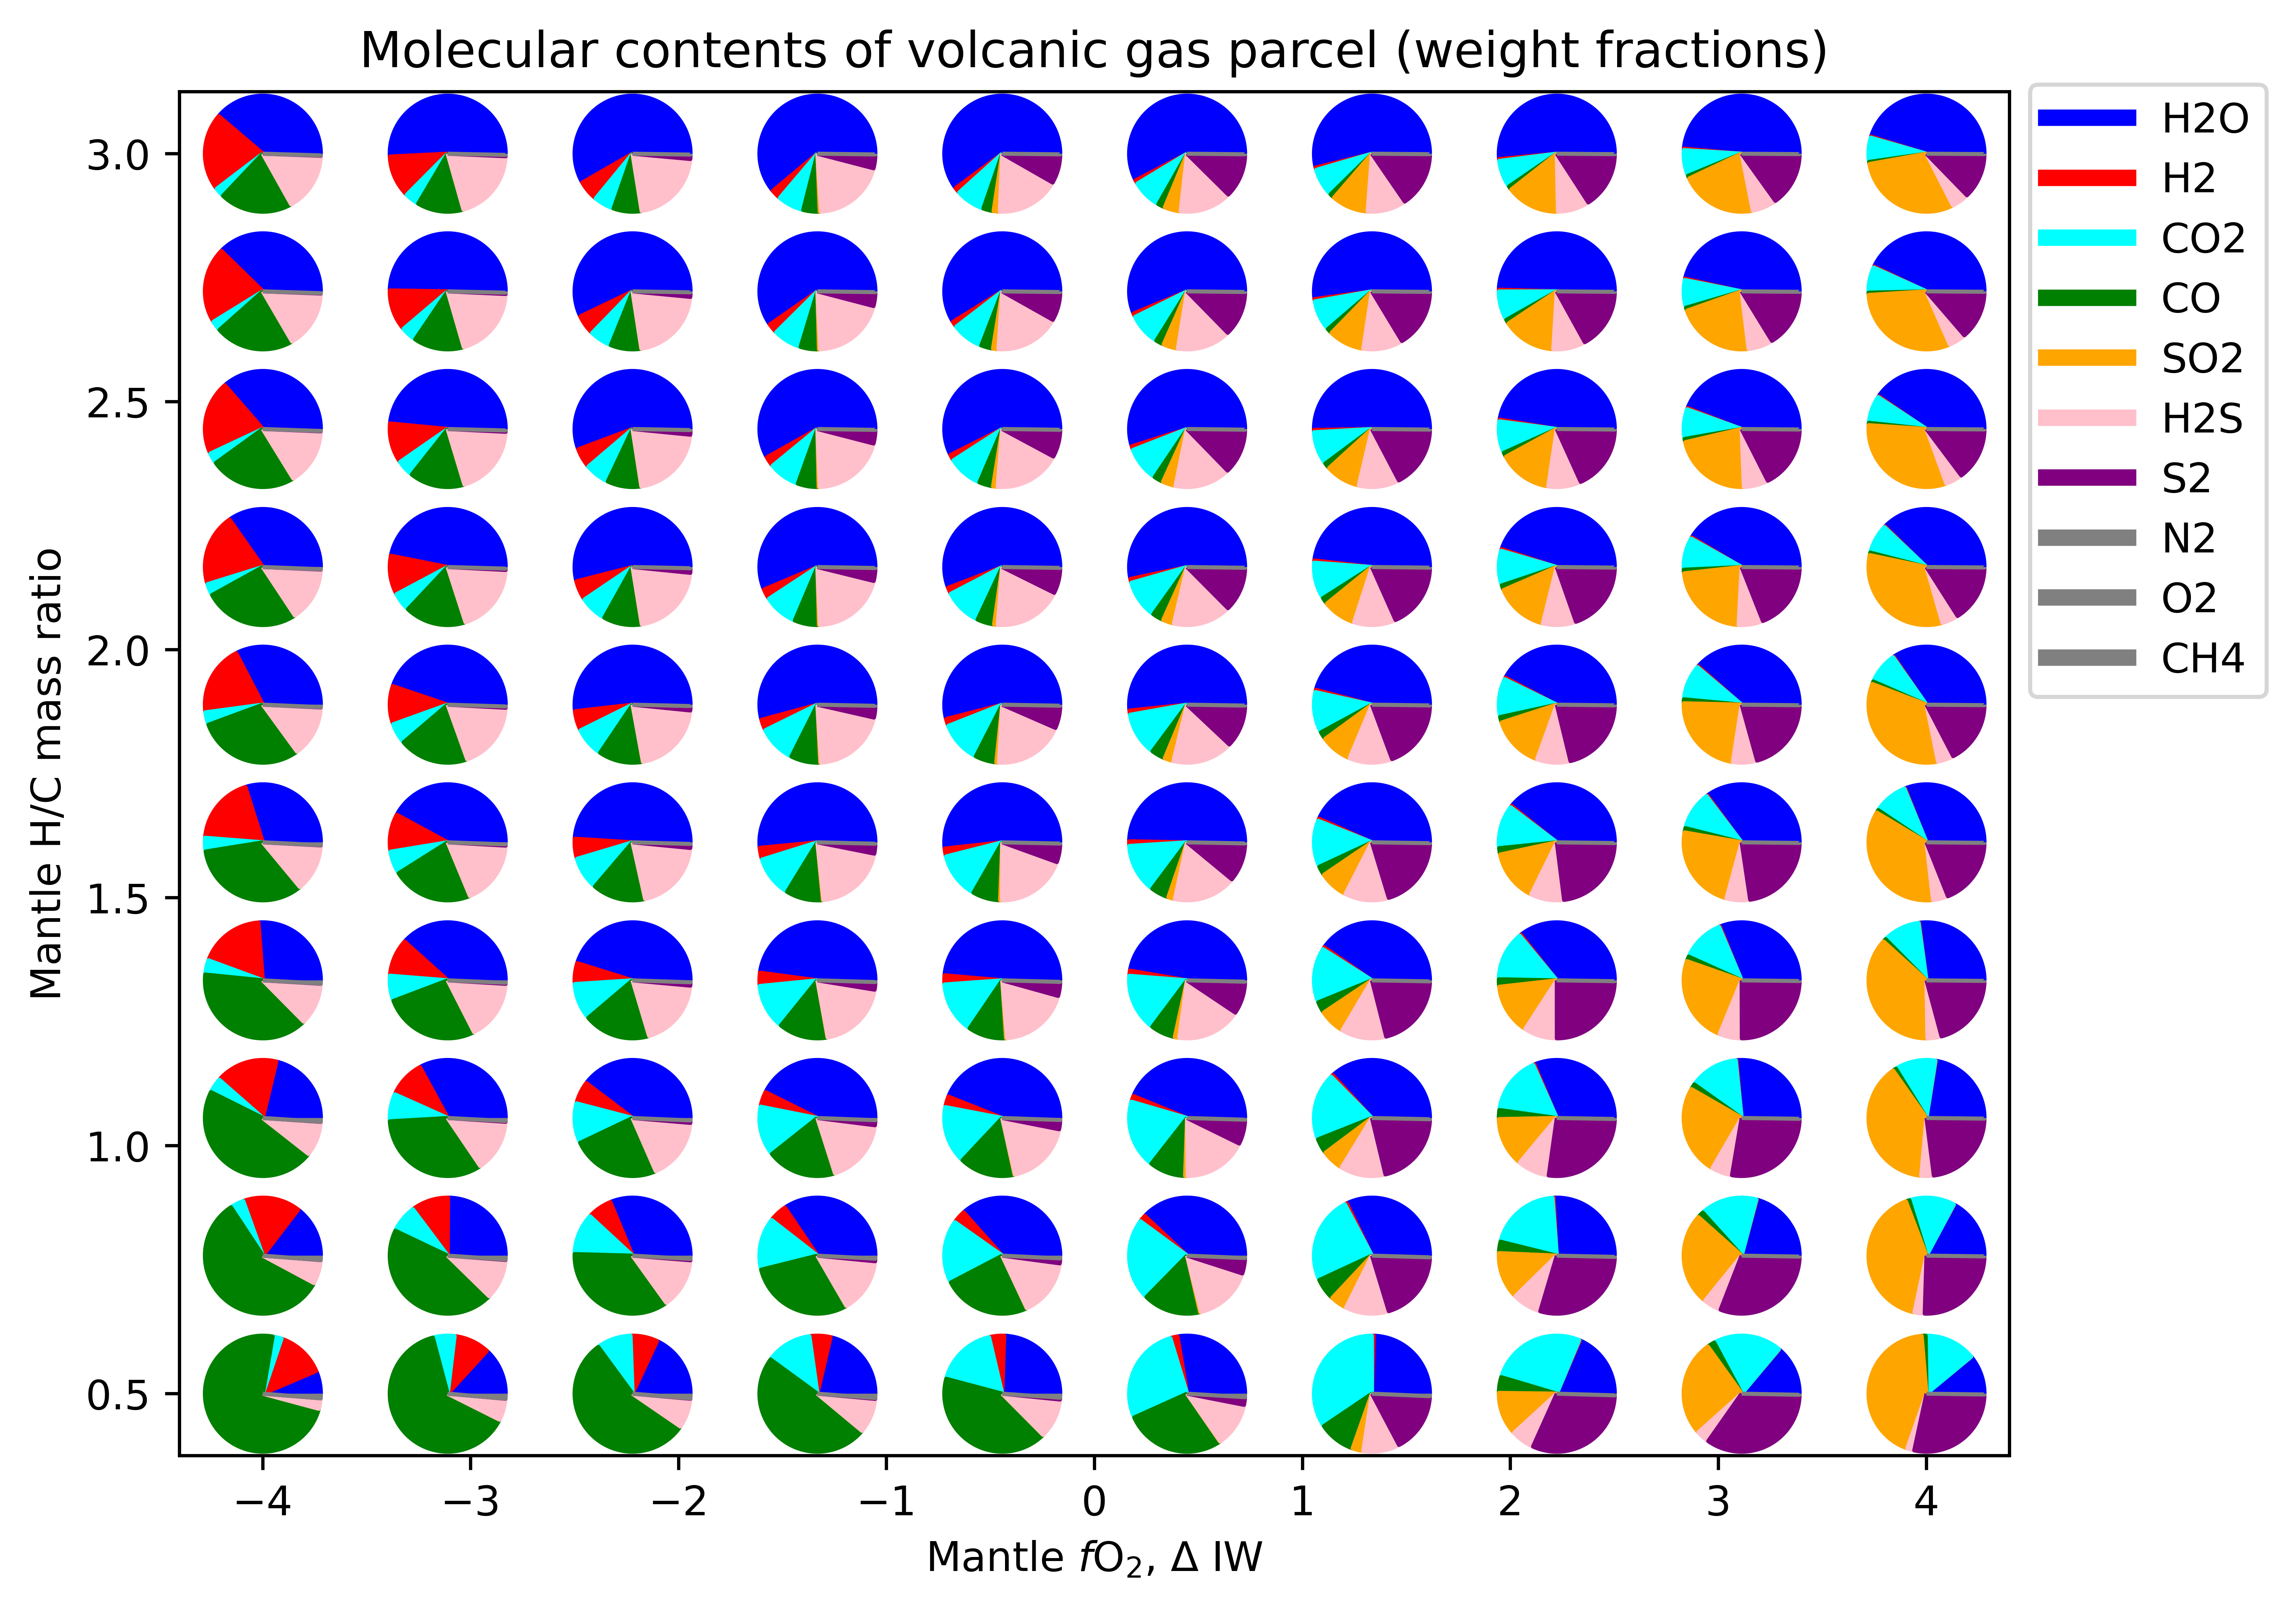

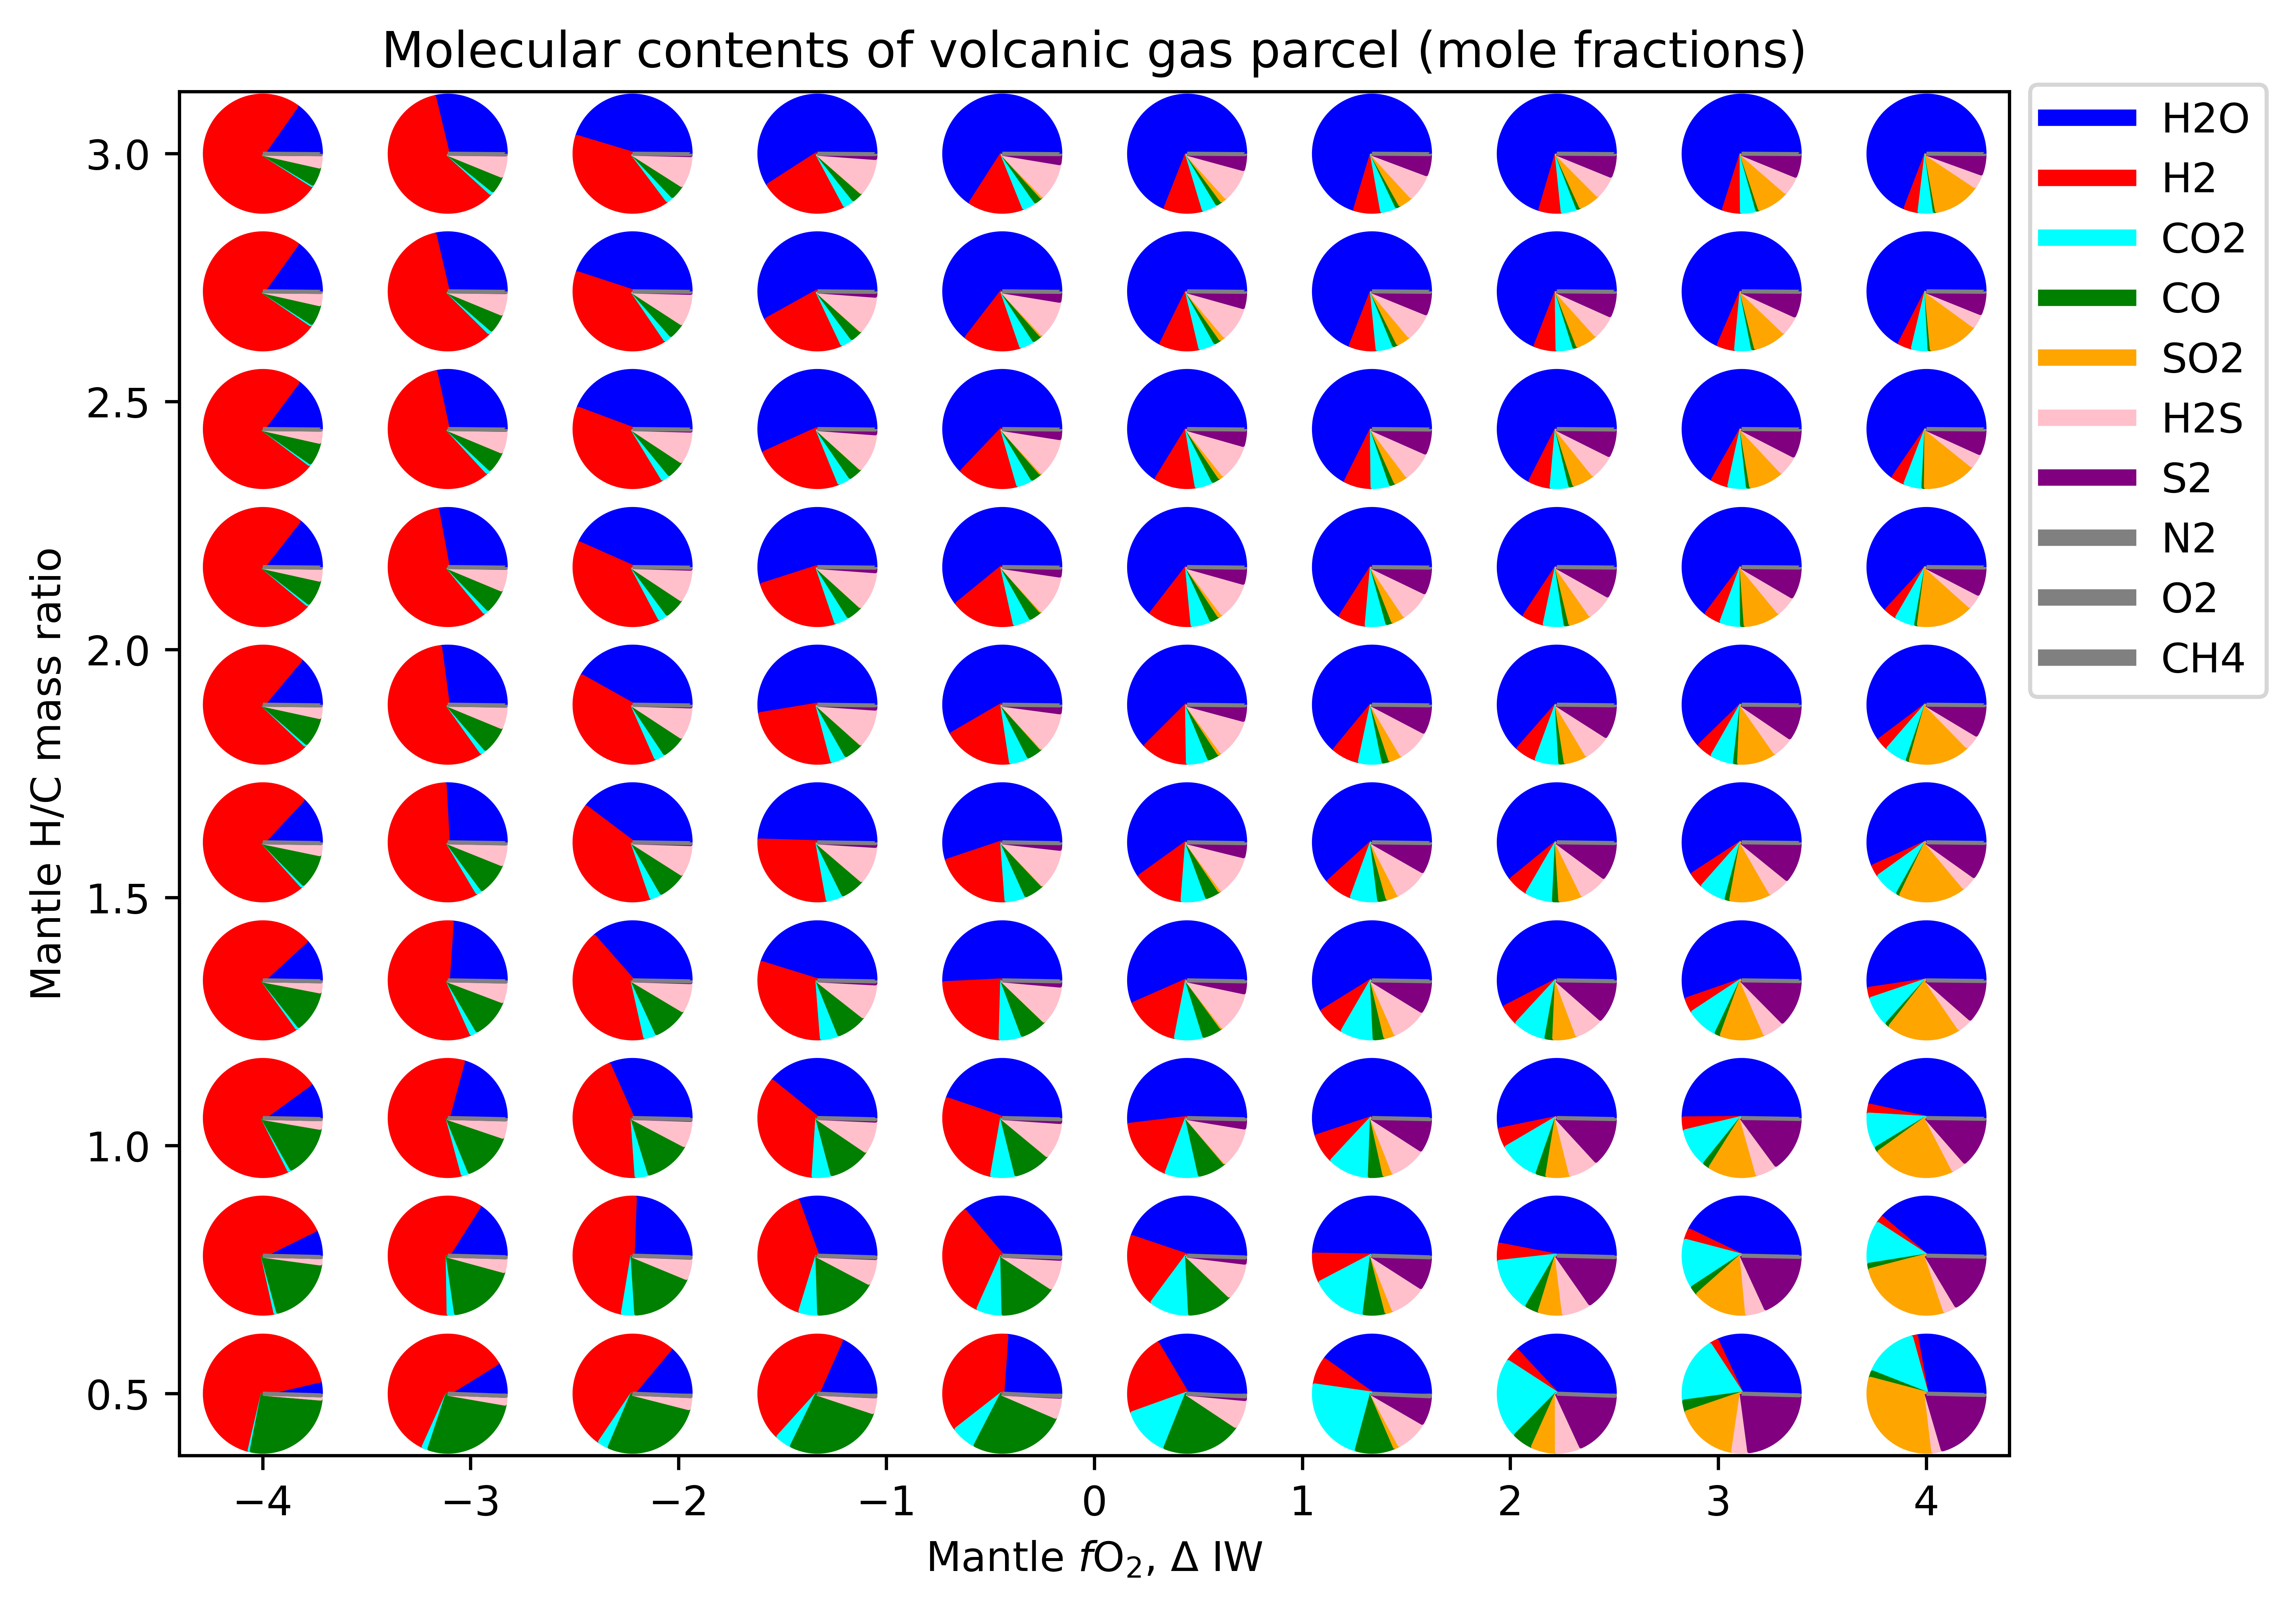

In [13]:
def savefigures(data,filename,title):
    volatile_labels = ['H2O', 'H2', 'O2', 'CO2', 'CO', 'CH4', 'SO2', 'H2S', 'S2', 'N2']
    volatile_colours = ["blue","red","gray","cyan","green","gray","orange","pink","purple","gray"]

    # start plot
    mpl.rcParams['figure.dpi'] = 800
    fig = figure(figsize=(8,6))
    frame1 = fig.add_subplot(1,1,1)

    for entry in range(len(data)):

        # find ratios of each molecule in the atmosphere
        ratios = []
        for i in range(len(data[entry])):
            ratios.append(data[entry][i]/sum(data[entry]))

        # make the ratios cumulative, this is needed for the pie charts
        ratios_cumulative = []
        for i in range(len(ratios)):
            ratios_cumulative.append(sum(ratios[:i+1]))

        # define the pie chart
        circles = []
        for i in range(len(ratios_cumulative)):
            if i == 0:
                x = [0] + np.cos(np.linspace(0, 2 * np.pi * ratios_cumulative[i], 100)).tolist()
                y = [0] + np.sin(np.linspace(0, 2 * np.pi * ratios_cumulative[i], 100)).tolist()
                xy = np.column_stack([x, y])
                circles.append(xy)
            else:
                x = [0] + np.cos(np.linspace(2 * np.pi * ratios_cumulative[i-1], 2 * np.pi * ratios_cumulative[i], 100)).tolist()
                y = [0] + np.sin(np.linspace(2 * np.pi * ratios_cumulative[i-1], 2 * np.pi * ratios_cumulative[i], 100)).tolist()
                xy = np.column_stack([x, y])
                circles.append(xy)

        # plot
        for i in range(len(ratios_cumulative)):
            frame1.scatter(coords[entry][0], coords[entry][1], marker=circles[i], s=800*(np.abs(circles[i]).max())**2, facecolor=volatile_colours[i])

    # make custom lines
    volatile_labels_custom = ['H2O', 'H2', 'CO2', 'CO', 'SO2', 'H2S', 'S2', 'N2', 'O2', 'CH4']
    volatile_colours_custom = ["blue","red","cyan","green","orange","pink","purple","gray","gray","gray"] # olive

    custom_lines = []
    for i in volatile_colours_custom:
        custom_lines.append(Line2D([0], [0], color=i, lw=4))

    frame1.legend(custom_lines,volatile_labels_custom,bbox_to_anchor=(1, 1.02))
    frame1.set_xlabel("Mantle $f$O$_2$, $\Delta$ IW")
    frame1.set_ylabel("Mantle H/C mass ratio")
    frame1.set_title(title)
    filepath = "../output/figures/" + filename
    plt.savefig(filepath)

savefigures(data_weight,'EVo_3dplot_weightfraction.png',"Molecular contents of volcanic gas parcel (weight fractions)")
savefigures(data_mole,'EVo_3dplot_molefraction.png',"Molecular contents of volcanic gas parcel (mole fractions)")